In [7]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
np.random.seed(10)

In [8]:
filepath="data/pima-indians-diabetes.xls"
all_df=pd.read_excel(filepath)

In [9]:
cols=['Outcome','Pregnancies','Glucose','Blood','Skin','Insulin',
      'BMI','Diabetes', 'Age']
all_df=all_df[cols]

In [10]:
all_df[:5]

,Outcome,Pregnancies,Glucose,Blood,Skin,Insulin,BMI,Diabetes,Age
0,1,6,148,72,35,0,33.6,0.627,50
1,0,1,85,66,29,0,26.6,0.351,31
2,1,8,183,64,0,0,23.3,0.672,32
3,0,1,89,66,23,94,28.1,0.167,21
4,1,0,137,40,35,168,43.1,2.288,33


In [11]:
zero_not_accepted = ['Glucose', 'Blood', 'Skin', 'BMI', 'Insulin']       
for column in zero_not_accepted: 
    mean = int(all_df[column].mean(skipna=True))
    all_df[column].replace(0, mean,inplace=True) 

In [12]:
msk = np.random.rand(len(all_df)) < 0.8
train_df = all_df[msk]
test_df = all_df[~msk]
print('total:',len(all_df),
      'train:',len(train_df),
      'test:',len(test_df))   

total: 768 train: 616 test: 152


In [13]:
trainray= train_df.values
train_Features = trainray[:,1:]
train_Label = trainray[:,0]
    
testray= test_df.values
test_Features = testray[:,1:]
test_Label = testray[:,0]

    
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
train_Features=minmax_scale.fit_transform(train_Features)  
test_Features=minmax_scale.fit_transform(test_Features)  

In [14]:
train_Features[:2]

array([[0.35294118, 0.67096774, 0.48979592, 0.30434783, 0.078125  ,
        0.31492843, 0.23244863, 0.48333333],
       [0.05882353, 0.26451613, 0.42857143, 0.23913043, 0.078125  ,
        0.17177914, 0.11429795, 0.16666667]])

In [15]:
train_Label[:2]

array([1., 0.])

In [16]:
test_Features[:2]

array([[0.76923077, 0.77941176, 0.52380952, 0.27659574, 0.12075472,
        0.62025316, 0.26952437, 0.26530612],
       [0.38461538, 0.76470588, 0.5       , 0.25531915, 0.30188679,
        0.23417722, 0.29888432, 0.6122449 ]])

In [17]:
test_Label[:2]

array([1., 1.])

In [18]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

Using TensorFlow backend.


In [19]:
train_Features.shape

(616, 8)

In [20]:
train_Features = train_Features.reshape(train_Features.shape[0], 4, 2, 1)

In [21]:
model = Sequential()

In [22]:
model.add(Conv2D(filters=1000,
                 kernel_size=(1,1),
                 padding='valid',
                 input_shape=(4,2,1), 
                 activation='relu'))

In [23]:
model.add(Conv2D(filters=1000,
                 kernel_size=(1,1),
                 padding='valid',
                 activation='relu'))

In [24]:
model.add(MaxPooling2D(pool_size=(1, 1)))

In [25]:
model.add(Dropout(0.25))

In [26]:
model.add(Flatten())

In [27]:
model.add(Dense(128, activation='tanh'))

In [28]:
model.add(Dropout(0.25))

In [29]:
model.add(Dense(1,activation='sigmoid'))

In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 4, 2, 1000)        2000      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 2, 1000)        1001000   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 2, 1000)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 2, 1000)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1024128   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [31]:
model.compile(loss='mean_squared_error',
              optimizer='Nadam',metrics=['accuracy']) 
model.fit(x=train_Features,y=train_Label)

Epoch 1/1
616/616 [==============================] - 8s 12ms/step - loss: 0.2442 - acc: 0.6299


In [32]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=10, 
                         batch_size=70,verbose=1)

Train on 492 samples, validate on 124 samples
Epoch 1/10
492/492 [==============================] - 4s 9ms/step - loss: 0.1765 - acc: 0.7480 - val_loss: 0.3447 - val_acc: 0.6290
Epoch 2/10
492/492 [==============================] - 4s 8ms/step - loss: 0.2244 - acc: 0.7053 - val_loss: 0.1560 - val_acc: 0.7661
Epoch 3/10
492/492 [==============================] - 4s 9ms/step - loss: 0.1719 - acc: 0.7439 - val_loss: 0.1797 - val_acc: 0.7258
Epoch 4/10
492/492 [==============================] - 5s 10ms/step - loss: 0.1592 - acc: 0.7764 - val_loss: 0.2795 - val_acc: 0.5645
Epoch 5/10
492/492 [==============================] - 4s 9ms/step - loss: 0.1822 - acc: 0.7195 - val_loss: 0.2132 - val_acc: 0.6694
Epoch 6/10
492/492 [==============================] - 3s 7ms/step - loss: 0.1708 - acc: 0.7480 - val_loss: 0.1797 - val_acc: 0.7097
Epoch 7/10
492/492 [==============================] - 4s 8ms/step - loss: 0.1586 - acc: 0.7764 - val_loss: 0.3634 - val_acc: 0.4839
Epoch 8/10
492/492 [=========

In [33]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

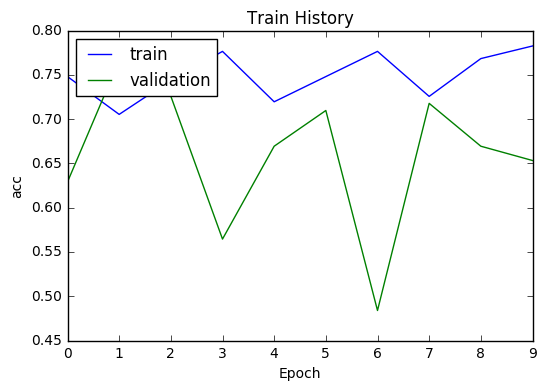

In [34]:
show_train_history(train_history,'acc','val_acc')

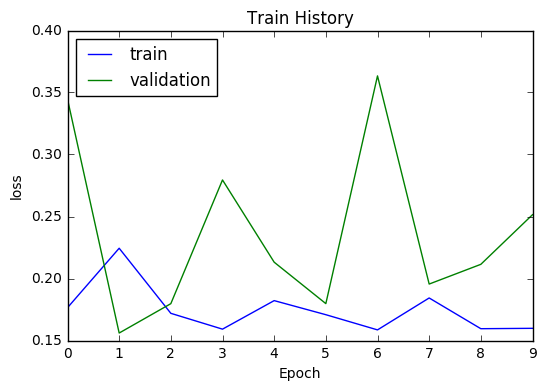

In [35]:
show_train_history(train_history,'loss','val_loss')

In [36]:
test_Features = test_Features.reshape(test_Features.shape[0], 4, 2, 1)

In [37]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

152/152 [==============================] - 0s 3ms/step


In [38]:
scores[1]

0.7171052631578947